# CSCI 349 Final Project - Data Prep and EDA
**Authors:** Nick Satriano, Jake Etzler, and Jake Luther  
**Date:** April 19th  
**Semester:** Spring 2023  
**Instructor:** Brian King

### Project Summary

We are looking at historical data from the United States Stock Market to see if we can predict future prices of certain stocks.

### The Data

We are using data from a github repository called **yfinance** which is a python package used for downloading Yahoo! Finance market data. This data contains historical data of every stock on the US Stock Market, and we can selectively choose to import data of specific stocks, or pull from different date ranges depending on our needs. Each observation in the data represents a daily observation for each stock. This dataframe has multi-level column names, meaning that the observations for each stock are grouped together on the same row, representing a single date, but all of their attributes are contained in a block of columns under the given stock name. The attributes for each stock on each day are reported in the data as follows: **Date (the index)**, **Open**, **High**, **Low**, **Close**, **Adj Close**, and **Volume**.

### Preprocessing the data

In [1]:
# import list
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from datetime import datetime, timezone

In [26]:
# data preprocessing for the PNM stock ticker
ticker = "PNM"
pnm_raw = yf.download(ticker, start="2010-01-01", end="2023-04-10", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [13]:
# showing the head of the imported PNM stock ticker dataframe
pnm_raw.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,12.75,12.95,12.63,12.71,8.673461,714500
2010-01-05,12.76,12.81,12.33,12.50,8.530158,1086400
2010-01-06,12.53,12.68,12.47,12.54,8.557453,688000
2010-01-07,12.51,12.62,12.43,12.52,8.543804,350400
2010-01-08,12.52,12.59,12.44,12.57,8.577925,350500


In [14]:
# showing the info of the imported PNM stock ticker dataframe
pnm_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3338 entries, 2010-01-04 to 2023-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3338 non-null   float64
 1   High       3338 non-null   float64
 2   Low        3338 non-null   float64
 3   Close      3338 non-null   float64
 4   Adj Close  3338 non-null   float64
 5   Volume     3338 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.5 KB


In [99]:
# making the data into a proper dataframe
pnm = pd.DataFrame(pnm_raw)

The **yfinance** package does amazing work to pre-process the data during import, we have 3338 entries for the PNM stock ticker, and for each variable there are 3338 non-null values. All of our variables are in their correct type, and the index is properly represented as a DatetimeIndex.  

The data prep for each stock ticker dataset is mostly left to choosing tickers with a substantial number of timestamps. This will ensure that there is a wealth of data to train and fit our models with which will increase our model's accuracy and ability to make predictions. We are specifically choosing to focus on stock tickers that have timestamps that have at least a decade of recorded data to work with. However, we will still also be testing the validity of our models across other date ranges as well. We have a list of about 2000 stock tickers with data which dates back to 2010 that we intend to use for our modeling.

### EDA and summary statistics of the data
You should strive to generate good summary statistics, show what the data looks like, and
include good EDA and visualizations with boxplots, barcharts, density plots for key variables, or
whatever other plots you want that are specific to your data and problem to help the reader
understand basic distributions of important variables. Remember - visualizations can help you
convey general info about your data and are extremely helpful.

In [29]:
# Showing the summary statistics of the PNM dataframe
pnm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3.338000e+03
mean,32.919164,33.197016,32.641600,32.931315,28.720481,6.164460e+05
std,12.573598,12.628167,12.511046,12.572949,13.270701,6.665694e+05
min,11.010000,11.140000,10.810000,10.940000,7.619684,1.024000e+05
25%,22.322500,22.570000,22.122500,22.360001,17.192061,3.716250e+05
50%,33.025000,33.390001,32.764999,33.080000,27.631353,5.154000e+05
75%,45.297501,45.660000,44.950001,45.312500,42.543432,7.155750e+05
max,55.959999,56.139999,55.770000,55.790001,51.256653,2.487620e+07


Text(0.5, 1.0, 'Scatterplot of the Open price of PNM over time')

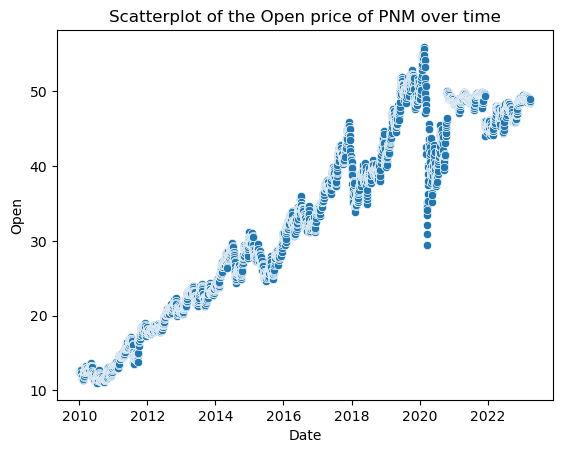

In [34]:
# creating a scatterplot of the Open variable
sns.scatterplot(data = pnm, x = pnm.index, y = pnm["Open"])
plt.title("Scatterplot of the Open price of PNM over time")

<Axes: title={'center': 'Scatterplot of the Adj Close price of PNM over time'}, xlabel='Date', ylabel='Adj Close'>

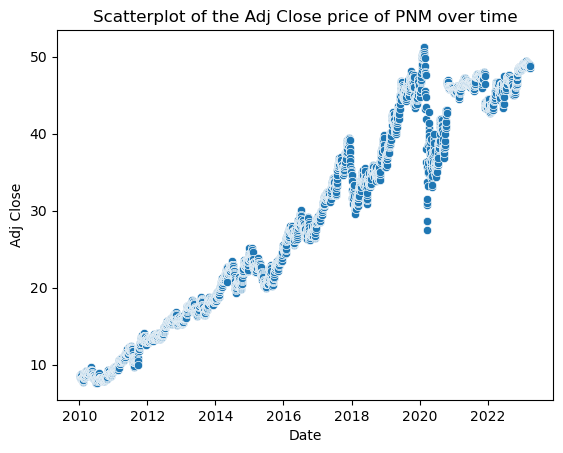

In [38]:
# creating a scatterplot of the Adj Close Variable
plt.title("Scatterplot of the Adj Close price of PNM over time")
sns.scatterplot(data = pnm, x = pnm.index, y = pnm["Adj Close"])

The **Open** and **Adj Close** variables have a very similar scatterplot shape, which is what we expect, as the closing prices and following day's opening prices should be the same or very similar.

Text(0.5, 1.0, 'Initial Boxplot of the Volume variable')

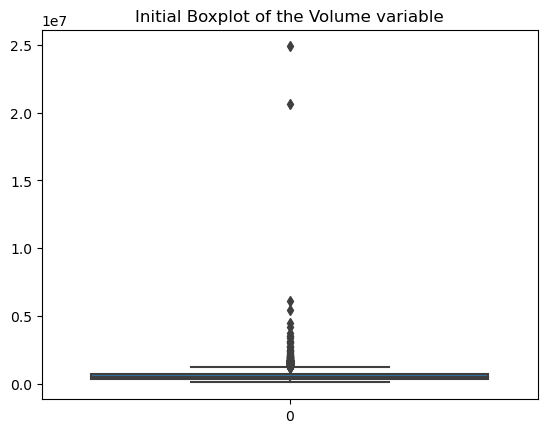

In [100]:
# creating a boxplot of the Volume variable
sns.boxplot(data = pnm["Volume"])
plt.title("Initial Boxplot of the Volume variable")

There are a lot of outliers in the Volume data that compress the boxplot. We're going to identify these outliers:

In [68]:
# finding high and low outliers for the Volume variable
stats = pnm.describe()
high = stats.loc['75%', "Volume"]
low = stats.loc['25%', "Volume"]

# Finding the interquartile range for the Volume variable
IQR = high - low

# finding the minimum and maximum threshold for outliers in the Volume variable
min_out = low - 1.5 * IQR
max_out = high + 1.5 * IQR

print("The minimum threshold for Volume outliers is:", min_out)
print("The maximum threshold for Volume outliers is:", max_out)

The minimum threshold for Volume outliers is: -144300.0
The maximum threshold for Volume outliers is: 1231500.0


In [91]:
# showing the dates where the Volume of trades was an outlier
pnm_vol_out = pnm[(pnm["Volume"] > 1231500) == True]
pnm_vol_out

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-21,12.740000,12.760000,12.350000,12.430000,8.482388,1336300
2010-01-22,12.320000,12.430000,11.920000,11.950000,8.154830,1233400
2010-01-27,11.810000,11.850000,11.550000,11.620000,8.013456,1923700
2010-02-08,11.350000,11.430000,11.270000,11.310000,7.799674,2097800
2010-02-09,11.460000,11.570000,11.230000,11.520000,7.944495,1654400
...,...,...,...,...,...,...
2022-11-10,47.759998,48.169998,47.150002,47.290001,46.936646,1275900
2022-12-16,48.779999,49.070000,48.689999,49.009998,48.643791,1590200
2023-02-01,49.270000,49.419998,49.150002,49.250000,48.882000,1376000


In [92]:
# showing the number of outliers
print("There are", len(pnm_vol_out), "outliers in the data.")

There are 182 outliers in the data.


Text(0.5, 1.0, 'KDE Plot of the Volume outliers')

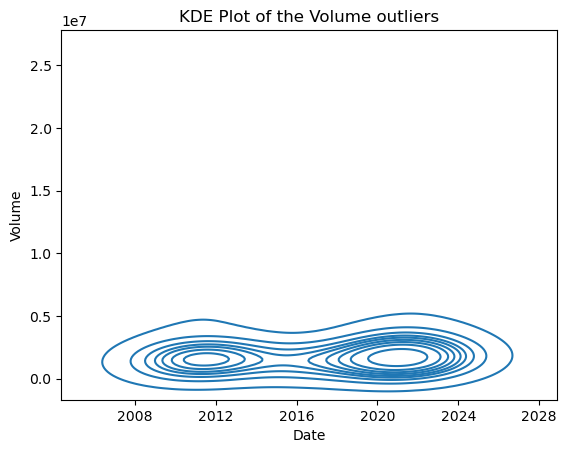

In [103]:
# showing a KDEPlot of the outlier data
sns.kdeplot(data = pnm_vol_out, x = pnm_vol_out.index, y = pnm_vol_out["Volume"])
plt.title("KDE Plot of the Volume outliers")

The KDE Plot above shows the distribution of the observations containing a Volume outlier. From the graph, we can see that kernel density for Volume is centered around two time periods, 2011-2012 and 2020-2022. This means that the high Volume outliers occurred most frequently around those periods.

In [71]:
# removing Volume outlier observations from dataframe, storing as new dataframe named pnm_clean
pnm_clean = pnm[(pnm["Volume"] > 1231500) != True]

Text(0.5, 1.0, 'Boxplot of the cleaned Volume data')

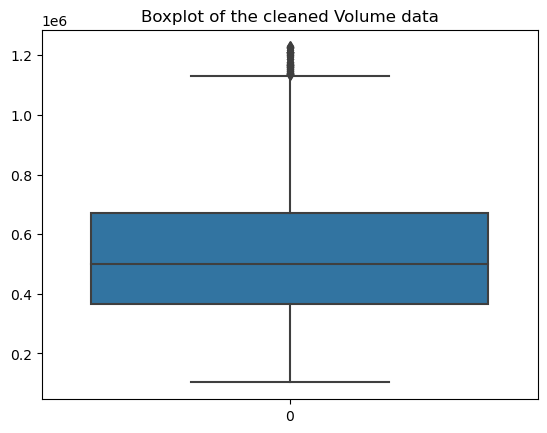

In [102]:
# re-creating the boxplot from before, with the outliers now removed
sns.boxplot(data = pnm_clean["Volume"])
plt.title("Boxplot of the cleaned Volume data")

Above is the boxplot of the Volume variable with the observations containing a Volume outlier are removed. We now can see a much better view of the distribution of the middle 50% of the data. The Volume variable is roughly centered at a median of 500000 trades.

Text(0.5, 1.0, 'KDEPlot of the cleaned Volume data')

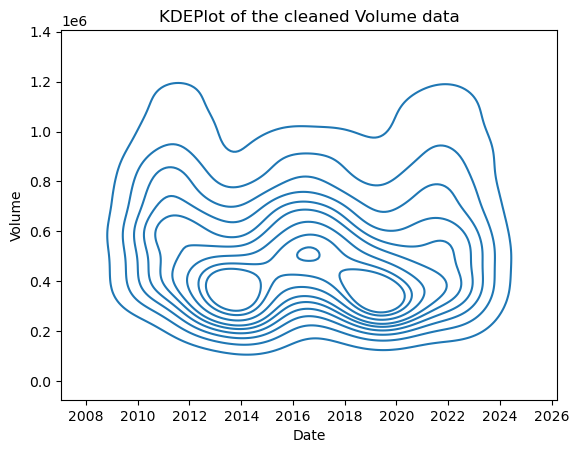

In [98]:
# creating a KDEP plot for the cleaned data
sns.kdeplot(data = pnm_clean, x = pnm_clean.index, y = pnm_clean["Volume"])
plt.title("KDEPlot of the cleaned Volume data")

This KDE Plot shows the kernel density of the cleaned data for the Volume variable over time. We can see that there are two large kernels centering around 2013-2015 and 2018-2020, with a smaller kernel between 2016-2017. This KDE plot does not show us much in the way of the overall trends of the Volume for trading of the PNM stock, considering the data is contained between 2010 and 2023.

### Models that we expect to use

The problem at hand is clearly a regression problem. Though Volume is an important factor in our data, and it may impact how we handle certain observations from the stock ticker, we are mainly looking at a continuous numerical variable relating to the price of the stock based on historical data (either **Open** or **Adj Close** price).

We plan to utilize the **Prophet Algorithm**, which is used for time-series forecasting, to attempt to predict the future prices of a handful of stocks.

_Reference: https://peerj.com/preprints/3190/_

### What we hope to learn from this project

Overall, we are interested in learning if stock market trends can be forecasted by a machine learning model. We are hoping to test some different models, compare their effectiveness at predicting certain stock ticker prices, and try to make some general predictions about these stocks for the future. Essentially, we are trying to find some sense and predictability in stock market trends which, has proven to become an infamously tricky challenge to many others. We forsee some challenges with fitting our model to data that does not represent a clear trend over long periods of time, but we intend to learn about the tools in the **yfinance** and **prophet** packages to steer us in the right direction.